# Unsupervised Learning

Goal: This notebook attempts to understand the data through unsupervised learning before going to work on Supervised Learning Technqiues.

Typically, it should help us identify underlying patterns and structures in the data without requiring labeled examples (although we have), which is beneficial when labels are scarce or expensive to obtain. This approach can uncover hidden relationships, clusters, or anomalies that inform the feature selection and data preprocessing steps for supervised learning

E.g. Patient Segmentation

In [55]:
import pandas as pd

In [56]:
# read csv file and print 5 five rows
df_mortality = pd.read_csv('../data/CARES_mortality_dropna.csv')
df_mortality.head()

,AGEcategory,SurgRiskCategory,Chinese,Indian,Malay,Anemia category,GradeofKidneyCategory,RDW15.7,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,ASAcategorybinned,GENDER,Mortality
0,2,0,1,0,0,1.0,0.0,0.0,0,0,0,0,0.0,0,0
1,3,1,1,0,0,2.0,0.0,0.0,0,0,0,0,0.0,1,0
2,3,0,1,0,0,1.0,0.0,1.0,0,0,0,0,1.0,1,1
3,2,0,0,1,0,0.0,0.0,0.0,0,0,0,0,0.0,1,0
4,1,1,1,0,0,0.0,1.0,0.0,0,0,0,0,1.0,0,0


In [57]:
# read csv file and print 5 five rows
df_icu = pd.read_csv('../data/CARES_ICU_dropna.csv')
df_icu.head()

,AGEcategory,SurgRiskCategory,Chinese,Indian,Malay,Anemia category,RDW15.7,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,GradeofKidneyCategory,DMinsulinRCRICategory,ASAcategorybinned,PriorityCategory,GENDER,ICUAdmgt24h
0,2,0,1,0,0,1.0,0.0,0,0,0,0.0,0,0.0,0,0,0
1,3,1,1,0,0,2.0,0.0,0,0,0,0.0,0,0.0,0,1,0
2,3,0,1,0,0,1.0,1.0,0,0,0,0.0,0,1.0,0,1,0
3,2,0,0,1,0,0.0,0.0,0,0,0,0.0,0,0.0,1,1,0
4,1,1,1,0,0,0.0,0.0,0,0,0,1.0,0,1.0,0,0,0


In [58]:
df_icu.describe()

,AGEcategory,SurgRiskCategory,Chinese,Indian,Malay,Anemia category,RDW15.7,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,GradeofKidneyCategory,DMinsulinRCRICategory,ASAcategorybinned,PriorityCategory,GENDER,ICUAdmgt24h
count,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000
mean,1.957181,0.533735,0.730819,0.085323,0.094473,0.396390,0.097760,0.019655,0.053849,0.010162,0.545067,0.025150,0.969710,0.194244,0.483185,0.013883
std,1.156852,0.574921,0.443537,0.279363,0.292488,0.698351,0.296992,0.138811,0.225722,0.100296,0.784175,0.156581,0.670211,0.395620,0.499720,0.117006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,5.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [59]:
df_mortality.describe()

,AGEcategory,SurgRiskCategory,Chinese,Indian,Malay,Anemia category,GradeofKidneyCategory,RDW15.7,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,ASAcategorybinned,GENDER,Mortality
count,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000
mean,1.957181,0.533735,0.730819,0.085323,0.094473,0.396390,0.545067,0.097760,0.019655,0.053849,0.010162,0.025150,0.969710,0.483185,0.065484
std,1.156852,0.574921,0.443537,0.279363,0.292488,0.698351,0.784175,0.296992,0.138811,0.225722,0.100296,0.156581,0.670211,0.499720,0.247380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,5.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


To note all of these df(s) cannot be used for unsupervised learning. We need in continuous forma.
Lets try another dataset from CARES_dataset_clean.csv

In [60]:
df_clean = pd.read_csv('../data/CARES_dataset_clean.csv')
df_clean.head()

,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,...,RaceCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h
0,FEMALE,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,GA,...,Chinese,no,no,no,no,no,NaN,NaN,I,no
1,FEMALE,NaN,none,NaN,NaN,0.0,0.0,0.0,0.0,GA,...,Chinese,no,no,no,no,no,NaN,<= 15.7,I,no
2,FEMALE,NaN,mild,152.538570,NaN,0.0,0.0,0.0,0.0,GA,...,Chinese,no,no,no,no,no,G1,<= 15.7,I,no
3,MALE,NaN,moderate/severe,117.231496,NaN,0.0,1.0,0.0,1.0,GA,...,Chinese,no,no,no,no,no,G1,<= 15.7,I,no
4,MALE,0.0,mild,98.651255,59.0,0.0,0.0,0.0,0.0,GA,...,Chinese,no,no,no,no,no,G1,>15.7,II,no


In [61]:
df_clean.columns

Index(['GENDER', 'RCRI score', 'Anemia category', 'PreopEGFRMDRD',
       'DaysbetweenDeathandoperation', 'Preoptransfusionwithin30days',
       'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop',
       'AnaestypeCategory', 'PriorityCategory',
       'TransfusionIntraandpostopCategory', 'AGEcategory', 'Mortality',
       'thirtydaymortality', 'SurgRiskCategory', 'RaceCategory',
       'CVARCRICategory', 'IHDRCRICategory', 'CHFRCRICategory',
       'DMinsulinRCRICategory', 'CreatinineRCRICategory',
       'GradeofKidneyCategory', 'RDW15.7', 'ASAcategorybinned', 'ICUAdmgt24h'],
      dtype='object')

In [62]:
# Number of categorical variable, Number of continuous variables
categorical = df_clean.select_dtypes(include=['object'])
continuous = df_clean.select_dtypes(include=['int64', 'float64'])

print('Number of categorical variables:', len(categorical.columns))
print('The continuous variables:\n', continuous.columns)
print('Number of continuous variables:', len(continuous.columns))

Number of categorical variables: 18
The continuous variables:
 Index(['RCRI score', 'PreopEGFRMDRD', 'DaysbetweenDeathandoperation',
       'Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days',
       'Transfusionintraandpostop'],
      dtype='object')
Number of continuous variables: 7


In [63]:
print(f'These are the Statistics Summary for the {len(continuous.columns)} continuous variables')
df_clean.describe()

These are the Statistics Summary for the 7 continuous variables


,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,63361.000000,79955.000000,5595.000000,90785.000000,90785.000000,90785.000000,90785.000000
mean,0.322296,96.426155,476.782127,0.042672,0.056276,0.018946,0.075222
std,0.634789,33.954241,421.866740,0.405840,0.230455,0.260728,0.395623
min,0.000000,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,79.078715,121.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,96.398561,355.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,114.310169,746.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


RE-generated a new dataset with Age as continuous value "CARES_dataset_clean_unsup.csv" using Data_preparation.ipynb

In [64]:
df_clean2 = pd.read_csv('../data/CARES_dataset_clean_unsup.csv')
df_clean2.head()

,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,...,RaceCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h
0,48,FEMALE,NaN,NaN,NaN,NaN,0,0,0,0,...,Chinese,no,no,no,no,no,NaN,NaN,I,no
1,36,FEMALE,NaN,none,NaN,NaN,0,0,0,0,...,Chinese,no,no,no,no,no,NaN,<= 15.7,I,no
2,64,FEMALE,NaN,mild,152.538570,NaN,0,0,0,0,...,Chinese,no,no,no,no,no,G1,<= 15.7,I,no
3,73,MALE,NaN,moderate/severe,117.231496,NaN,0,1,0,1,...,Chinese,no,no,no,no,no,G1,<= 15.7,I,no
4,73,MALE,0.0,mild,98.651255,59.0,0,0,0,0,...,Chinese,no,no,no,no,no,G1,>15.7,II,no


In [65]:
# Number of categorical variable, Number of continuous variables
categorical = df_clean2.select_dtypes(include=['object'])
continuous = df_clean2.select_dtypes(include=['int64', 'float64'])

print('Number of categorical variables:', len(categorical.columns))
print('The continuous variables:\n', continuous.columns)
print('Number of continuous variables:', len(continuous.columns))

Number of categorical variables: 19
The continuous variables:
 Index(['AGE', 'RCRI score', 'PreopEGFRMDRD', 'DaysbetweenDeathandoperation',
       'Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days',
       'Transfusionintraandpostop'],
      dtype='object')
Number of continuous variables: 8


Here you can see i have included Age continuous variable in. But need to make sure the count for all is the same. Feel free to regenerate the csv data needed for clustering process

In [66]:
df_clean2.describe()

,AGE,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,78868.000000,53331.000000,71568.000000,5595.000000,78868.000000,78868.000000,78868.000000,78868.000000
mean,52.846237,0.377210,95.915788,476.782127,0.049095,0.064462,0.021809,0.086271
std,17.214261,0.673779,35.364966,421.866740,0.435033,0.245576,0.279622,0.422991
min,18.000000,0.000000,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,77.419564,121.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,95.699813,355.000000,0.000000,0.000000,0.000000,0.000000
75%,66.000000,1.000000,114.880217,746.000000,0.000000,0.000000,0.000000,0.000000
max,103.000000,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


0. 1st thing 1st is that the observation count for all columns are different!
AGE is ok... RCRI score impute median in 
1. Age itself, the range is pretty huge from 18 to 103 years old. Std Dev: 17.09
2. On the other hand, RCRI score scales from 0 to 6 only
3. PreopEGFRMDRD Range: 2.54 to 671.30 - the wide range of PreopEGFRMDRD, will overshadow the RCRI 
4. and looking at the rest... it is the same issue. As such we need to do z-standardisation so that we can ensure all features contribute equally to even though they have an initial varying scales:


In [69]:
#check the proportion of AGE is missing

df_clean2['AGE'].isnull().sum()/len(df_clean2['AGE'])

0.0

In [86]:
#check the proportion of RCRI is missing

print(df_clean2['RCRI score'].isnull().sum()/len(df_clean2['RCRI score'])*100, 'percent score is missing')
df_clean2['RCRI score'].value_counts()    

32.37941877567581 percent score is missing


RCRI score
0.0    37654
1.0    12359
2.0     2436
3.0      679
4.0      168
5.0       33
6.0        2
Name: count, dtype: int64

Quite bad to have 32% data missing for RCRI column, suspect these folks did not take the score. Shall impute with the median value instead

In [87]:
# Median Imputation
df_clean2['RCRI score'].fillna(df_clean2['RCRI score'].median(), inplace=True)


In [88]:
df_clean2.describe()

,AGE,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,78868.000000,78868.000000,71568.000000,5595.000000,78868.000000,78868.000000,78868.000000,78868.000000
mean,52.846237,0.255072,95.915788,476.782127,0.049095,0.064462,0.021809,0.086271
std,17.214261,0.581494,35.364966,421.866740,0.435033,0.245576,0.279622,0.422991
min,18.000000,0.000000,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,77.419564,121.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,95.699813,355.000000,0.000000,0.000000,0.000000,0.000000
75%,66.000000,0.000000,114.880217,746.000000,0.000000,0.000000,0.000000,0.000000
max,103.000000,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


For Days between DeathAndOperation, suspect these are people still living for the missing records, shall fill zeros in since still alive.

In [89]:
df_clean2['DaysbetweenDeathandoperation'].fillna(0, inplace=True)  # Assuming missing indicates not applicable

C:\Users\scien\AppData\Local\Temp\ipykernel_48288\1252141665.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean2['DaysbetweenDeathandoperation'].fillna(0, inplace=True)  # Assuming missing indicates not applicable


In [90]:
df_clean2.describe()

,AGE,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,78868.000000,78868.000000,71568.000000,78868.000000,78868.000000,78868.000000,78868.000000,78868.000000
mean,52.846237,0.255072,95.915788,33.823553,0.049095,0.064462,0.021809,0.086271
std,17.214261,0.581494,35.364966,166.150723,0.435033,0.245576,0.279622,0.422991
min,18.000000,0.000000,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,77.419564,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,95.699813,0.000000,0.000000,0.000000,0.000000,0.000000
75%,66.000000,0.000000,114.880217,0.000000,0.000000,0.000000,0.000000,0.000000
max,103.000000,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


Ok lastly the PreopEGFRMDRD has about 5-10% missing data, to avoid hassle, can just try to impute the median first. Missing values might be due to unavailable test results or errors

In [91]:
# Impute PreopEGFRMDRD with median
df_clean2['PreopEGFRMDRD'].fillna(df_clean2['PreopEGFRMDRD'].median(), inplace=True)

C:\Users\scien\AppData\Local\Temp\ipykernel_48288\3230162928.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean2['PreopEGFRMDRD'].fillna(df_clean2['PreopEGFRMDRD'].median(), inplace=True)


In [92]:
df_clean2.describe()

,AGE,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,78868.000000,78868.000000,78868.000000,78868.000000,78868.000000,78868.000000,78868.000000,78868.000000
mean,52.846237,0.255072,95.895797,33.823553,0.049095,0.064462,0.021809,0.086271
std,17.214261,0.581494,33.688583,166.150723,0.435033,0.245576,0.279622,0.422991
min,18.000000,0.000000,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,79.623276,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,95.699813,0.000000,0.000000,0.000000,0.000000,0.000000
75%,66.000000,0.000000,112.522764,0.000000,0.000000,0.000000,0.000000,0.000000
max,103.000000,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


Ok now that i have all my missing values settled, time to use z-standardisation

In [93]:
from sklearn.preprocessing import StandardScaler

Identified the continuous variables that I want to standardize. These include:

- AGE
- RCRI score
- PreopEGFRMDRD
- DaysbetweenDeathandoperation
- Preoptransfusionwithin30days
- Intraop
- Postopwithin30days
- Transfusionintraandpostop

In [96]:
# apply standard scaler to the continuous variables
scaler = StandardScaler()
clean2_std = scaler.fit_transform(df_clean2[continuous.columns])

In [97]:
clean2_std

array([[-0.28152631, -0.43865173, -0.00581757, ..., -0.26249539,
        -0.07799361, -0.2039552 ],
       [-0.97862716, -0.43865173, -0.00581757, ..., -0.26249539,
        -0.07799361, -0.2039552 ],
       [ 0.64794148, -0.43865173,  1.68137475, ..., -0.26249539,
        -0.07799361, -0.2039552 ],
       ...,
       [-0.39770979, -0.43865173, -0.00581757, ..., -0.26249539,
        -0.07799361, -0.2039552 ],
       [ 0.76412496,  3.00078604, -1.41165085, ..., -0.26249539,
        -0.07799361, -0.2039552 ],
       [-0.16534284,  1.28106715,  0.91119553, ..., -0.26249539,
        -0.07799361, -0.2039552 ]])

In [99]:
df_clean2_std = pd.DataFrame(clean2_std, columns=continuous.columns)
df_clean2_std.head()

,AGE,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
0,-0.281526,-0.438652,-0.005818,-0.203573,-0.112853,-0.262495,-0.077994,-0.203955
1,-0.978627,-0.438652,-0.005818,-0.203573,-0.112853,-0.262495,-0.077994,-0.203955
2,0.647941,-0.438652,1.681375,-0.203573,-0.112853,-0.262495,-0.077994,-0.203955
3,1.170767,-0.438652,0.633325,-0.203573,-0.112853,3.809591,-0.077994,2.160175
4,1.170767,-0.438652,0.081793,0.151529,-0.112853,-0.262495,-0.077994,-0.203955


In [ ]:
#df_clean2_std.describe() #uncomment if you want to double check the standardization

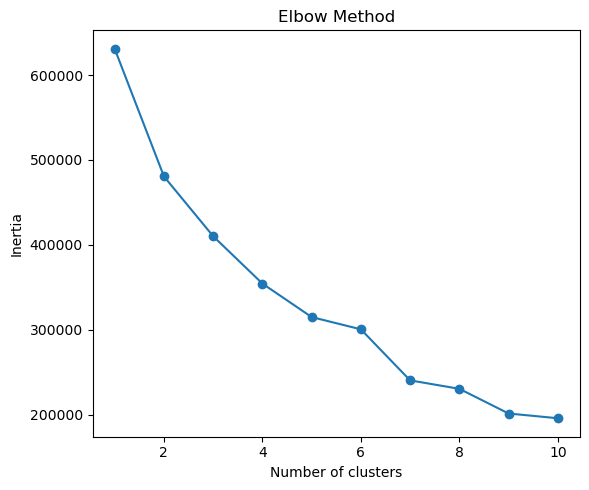

In [102]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
range_of_clusters = range(2, 11)  # start from 2 for silhouette scores

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0,n_init='auto')
    kmeans.fit(clean2_std)
    inertias.append(kmeans.inertia_)

# Plotting inertia
plt.figure(figsize=(6, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

When k=3, there is a sharp decrease, but K = 4 / 5 the rate of decrease of Inertia starts to slow down and later showing diminishing rate of decrease
- Decided to set K= 4 in this case

In [117]:
kmeans = KMeans(n_clusters=4, init='random', random_state=0)
kmeans.fit(clean2_std)

c:\Users\scien\anaconda3\envs\smumitb\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init='random', n_clusters=4, random_state=0)

In [118]:
df_clean2_std['cluster'] = kmeans.labels_ # Add the cluster labels to a new column in ckd
df_clean2_std.head()

,AGE,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,cluster
0,-0.281526,-0.438652,-0.005818,-0.203573,-0.112853,-0.262495,-0.077994,-0.203955,3
1,-0.978627,-0.438652,-0.005818,-0.203573,-0.112853,-0.262495,-0.077994,-0.203955,3
2,0.647941,-0.438652,1.681375,-0.203573,-0.112853,-0.262495,-0.077994,-0.203955,3
3,1.170767,-0.438652,0.633325,-0.203573,-0.112853,3.809591,-0.077994,2.160175,1
4,1.170767,-0.438652,0.081793,0.151529,-0.112853,-0.262495,-0.077994,-0.203955,0


Visualisation of data through T-SNE with K clusters identified from Knee-Elbow

In [119]:
df_clean2_std['cluster'].unique()

array([3, 1, 0, 2])

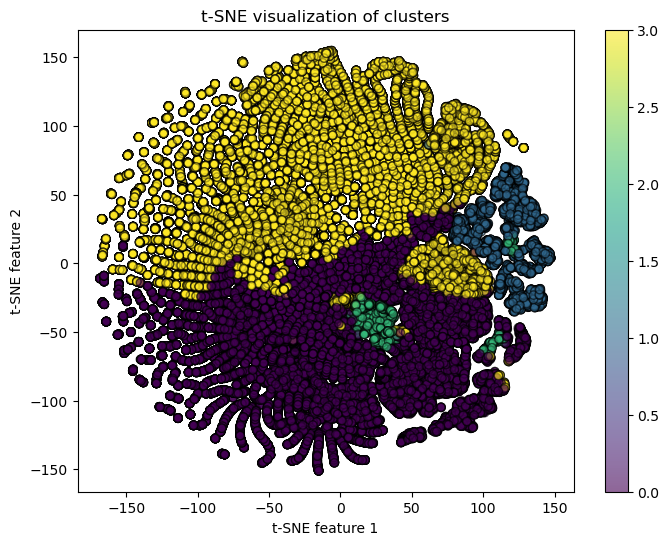

In [120]:
# Now we can visualise using t-sne; code adapted from Lec 3 Lab 2 // https://github.com/ISSS623-AHA/ISSS623_2024/blob/main/Lecture%203/Lecture%203_Lab2_Clustering.ipynb

from sklearn.manifold import TSNE

# Applying t-SNE to reduce dimensionality for ckd_std data
tsne = TSNE(n_components=2, random_state=42)  # Using two components for a 2D plot
clean2_tsne = tsne.fit_transform(clean2_std)

# Assign labels to your data
cluster_labels = kmeans.labels_

# Plotting the t-SNE output with cluster labels
plt.figure(figsize=(8, 6))
scatter = plt.scatter(clean2_tsne[:, 0], clean2_tsne[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE visualization of clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

# Profiling my Clusters

In [121]:
df_clean2.dtypes

AGE                               int64
RCRI score                      float64
PreopEGFRMDRD                   float64
DaysbetweenDeathandoperation    float64
Preoptransfusionwithin30days      int64
Intraop                           int64
Postopwithin30days                int64
Transfusionintraandpostop         int64
Cluster                           int32
dtype: object

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_clean2 is your DataFrame with the 'Cluster' column from K-Means

# Take only the continuous columns df_clean2
df_clean2 = df_clean2.select_dtypes(include=['int64', 'float64'])
# Add cluster label to df_clean2
df_clean2['Cluster'] = kmeans.labels_

df_clean2.groupby('Cluster').mean()


,AGE,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
Cluster,,,,,,,,
0,65.779169,0.382657,79.121185,10.726847,0.000636,0.000000,0.000116,0.000116
1,59.340909,0.562906,93.902975,56.784700,0.762784,0.998782,0.345982,1.344765
2,66.619629,0.536133,73.477757,931.063477,0.037598,0.079102,0.003906,0.083008
3,39.250737,0.080792,112.930424,2.949595,0.000375,0.000000,0.000080,0.000080


### Cluster Analysis Summary

Data summarized below is based on how the imputation is done, may need to refine. Example, alot of zeros filled will result in a skew of the mean towards zero:
| **Cluster** | **Color** | **Age** | **RCRI Score** | **PreopEGFRMDRD** | **Days Between Death and Operation** | **Medical Interventions** | **Key Findings** |
|-------------|-----------|---------|----------------|-------------------|--------------------------------------|---------------------------|------------------|
| **0**       | ![#9467bd](https://via.placeholder.com/15/9467bd/000000?text=+) Purple | 65.78   | 0.38           | 79.12             | 10.73                                | Minimal                   | Older patients with lower cardiac risk and mild kidney impairment. Short follow-up period suggests need for monitoring. |
| **1**       | ![#1f77b4](https://via.placeholder.com/15/1f77b4/000000?text=+) Blue | 59.34   | 0.56           | 93.90             | 56.78                                | Frequent                  | Middle-aged patients with normal kidney function but frequent surgical interventions. Indicates complex health issues. |
| **2**       | ![#ff7f0e](https://via.placeholder.com/15/ff7f0e/000000?text=+) Yellow | 66.62   | 0.54           | 73.48             | 931.06                               | Minimal                   | Older patients with chronic kidney issues and long-term survival. Requires effective chronic management. |
| **3**       | ![#2ca02c](https://via.placeholder.com/15/2ca02c/000000?text=+) Green | 39.25   | 0.08           | 112.93            | 2.95                                 | Minimal                   | Young, healthy individuals with excellent kidney function but short post-surgery survival, indicating possible acute conditions. |

### Insights and Recommendations

- **Cluster 0**: Monitor due to age-related risks; focus on kidney health.
- **Cluster 1**: Prioritize resources for medical and surgical interventions due to moderate risk.
- **Cluster 2**: Manage chronic conditions effectively for older individuals.
- **Cluster 3**: Investigate post-surgical care to improve outcomes in emergency cases.

**Visualization**: Refer to the t-SNE plot above for a visual representation of cluster separations and data distribution.
